# Trying to reproduce Figure 1

In [1]:
from biom import load_table
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Figure 1E, Taxonomy WGS

/Users/antoniog/.virtualenvs/qiita-analysis/lib/python3.5/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:111: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1.513720652865238 and the largest is 63.563217229864286.
  RuntimeWarning


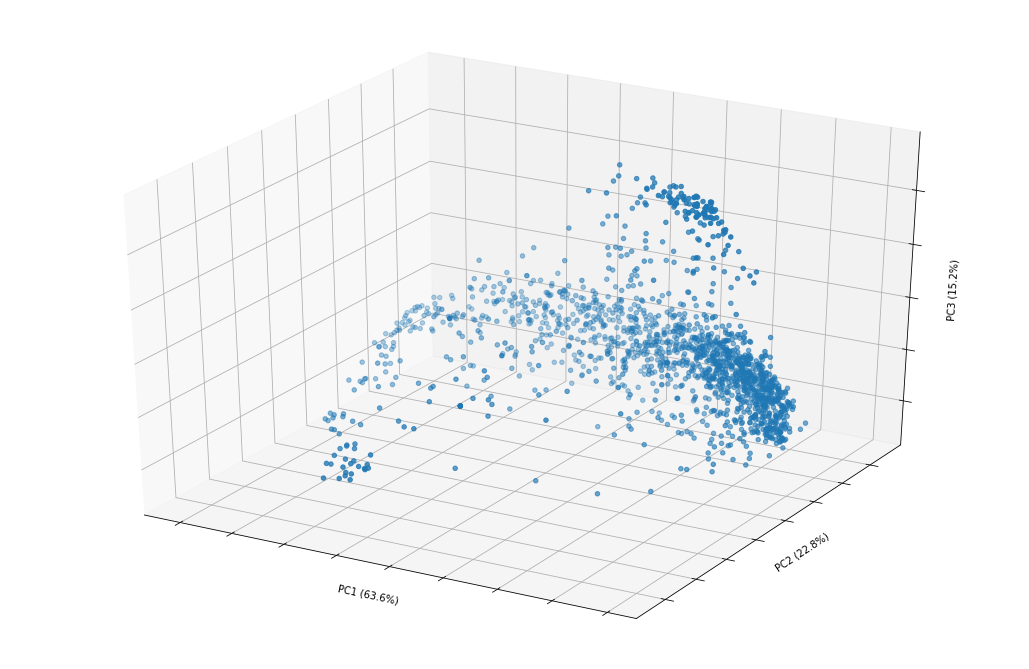

In [2]:
# Downloading WGS data
!curl -s -o taxonomic_profiles.tsv.gz \
    https://ibdmdb.org/tunnel/cb/document/Public/HMP2/WGS/1750/taxonomic_profiles.tsv.gz
!biom convert -i taxonomic_profiles.tsv.gz -o taxonomic_profiles.biom \
    --table-type="OTU table" --to-hdf5

# loading data
bf = load_table('taxonomic_profiles.biom')
ids = bf.ids()
data = [bf.data(_id, axis='sample') for _id in ids]

# distance and pcoa
bc_dm = beta_diversity("braycurtis", data, ids, validate=False)
bc_pc = pcoa(bc_dm)

# plotting
f = bc_pc.plot(axis_labels=['PC%d (%.1f%%)' % (i + 1, bc_pc.eigvals[i]) for i in [0, 1, 2]])
f.set_size_inches(15, 10)

### Histogram of counts per sample

Here we would expect two scenarios:
- Absolute abundance: this should be the ideal sceneario. Samples ranging from 0 to millions (these are sequences)
- Relative abundance: all samples should be between 0-1

Issue: we have samples that sum to 0 and others that sum to 8.

(array([  5.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   4.00000000e+00,
          1.62800000e+03]),
 array([ 1.        ,  1.70000021,  2.40000042,  3.10000063,  3.80000084,
         4.50000105,  5.20000126,  5.90000147,  6.60000168,  7.30000189,
         8.0000021 ]),
 <a list of 10 Patch objects>)

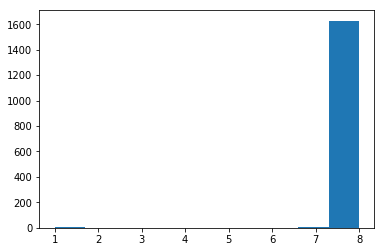

In [3]:
plt.hist([sum(bf.data(_id, axis='sample')) for _id in ids])

##  Figure 1F, bottom left panel, Transcriptomics
### Issue: Files in the server are empty

In [4]:
# Downloading MTX data
!curl -s -o genefamilies.tsv.gz \
    https://ibdmdb.org/tunnel/cb/document/Public/HMP2/MTX/1730/genefamilies.tsv.gz
!ls -lah genefamilies.tsv.gz

-rw-r--r--  1 antoniog  staff     0B Jan 11 11:37 genefamilies.tsv.gz


In [5]:
# Let's try another one
!curl -s -o ecs.tsv.gz \
    https://ibdmdb.org/tunnel/cb/document/Public/HMP2/MTX/1730/ecs.tsv.gz
!ls -lah ecs.tsv.gz

-rw-r--r--  1 antoniog  staff     0B Jan 11 11:37 ecs.tsv.gz


## Figure 1F, bottom right panel, 16S biopsies

/Users/antoniog/.virtualenvs/qiita-analysis/lib/python3.5/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:111: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.25562743740285415 and the largest is 9.9758367319952.
  RuntimeWarning


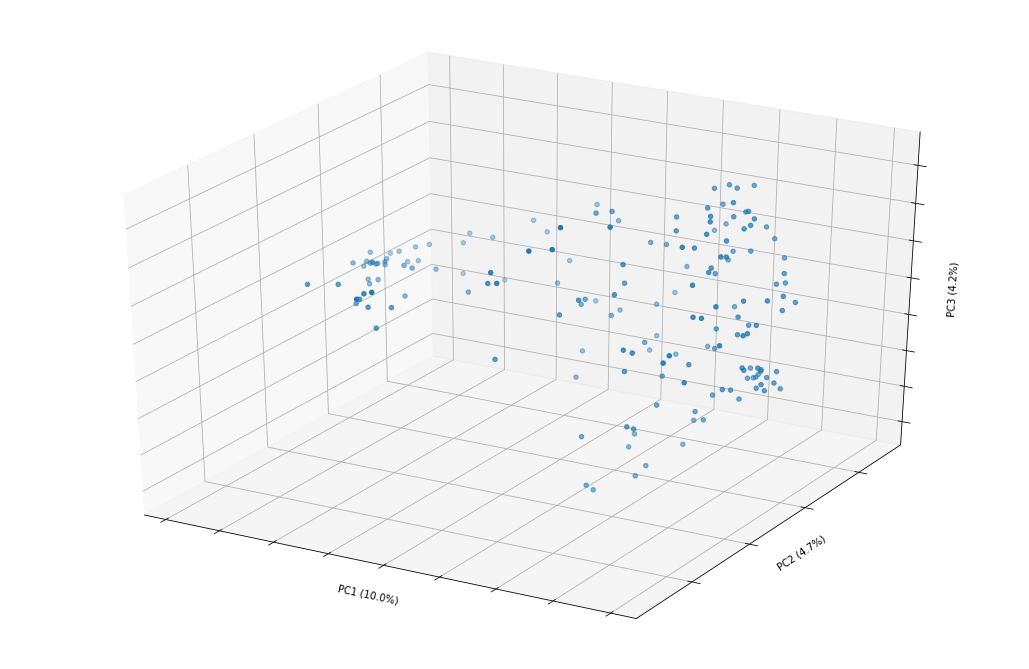

In [6]:
# Downloading 16S data
!curl -s -o taxonomic_profiles.tsv.gz \
    https://ibdmdb.org/tunnel/cb/document/Public/HMP2/16S/1802/taxonomic_profiles.tsv.gz
!biom convert -i taxonomic_profiles.tsv.gz -o taxonomic_profiles.biom \
    --table-type="OTU table" --to-hdf5

# loading data
bf = load_table('taxonomic_profiles.biom')
ids = bf.ids()
data = [bf.data(_id, axis='sample') for _id in ids]

# distance and pcoa
bc_dm = beta_diversity("braycurtis", data, ids, validate=False)
bc_pc = pcoa(bc_dm)

# plotting
f = bc_pc.plot(axis_labels=['PC%d (%.1f%%)' % (i + 1, bc_pc.eigvals[i]) for i in [0, 1, 2]])
f.set_size_inches(15, 10)

### Histogram of counts per sample

Similar to previous histogram, we would expect two scenarios:
- Absolute abundance: this should be the ideal sceneario. Samples ranging from 0 to millions (these are sequences)
- Relative abundance: all samples should be between 0-1

This seems fine but the PCoA is not the same than in the MS

(array([ 32.,  11.,  11.,  12.,  13.,  24.,  21.,  32.,  16.,   6.]),
 array([    34. ,   3208.7,   6383.4,   9558.1,  12732.8,  15907.5,
         19082.2,  22256.9,  25431.6,  28606.3,  31781. ]),
 <a list of 10 Patch objects>)

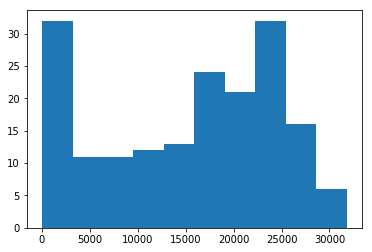

In [7]:
plt.hist([sum(bf.data(_id, axis='sample')) for _id in ids])

## Figure 1F, top left panel, Metabolites

/Users/antoniog/.virtualenvs/qiita-analysis/lib/python3.5/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:111: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.22478671364776412 and the largest is 20.609730414508178.
  RuntimeWarning


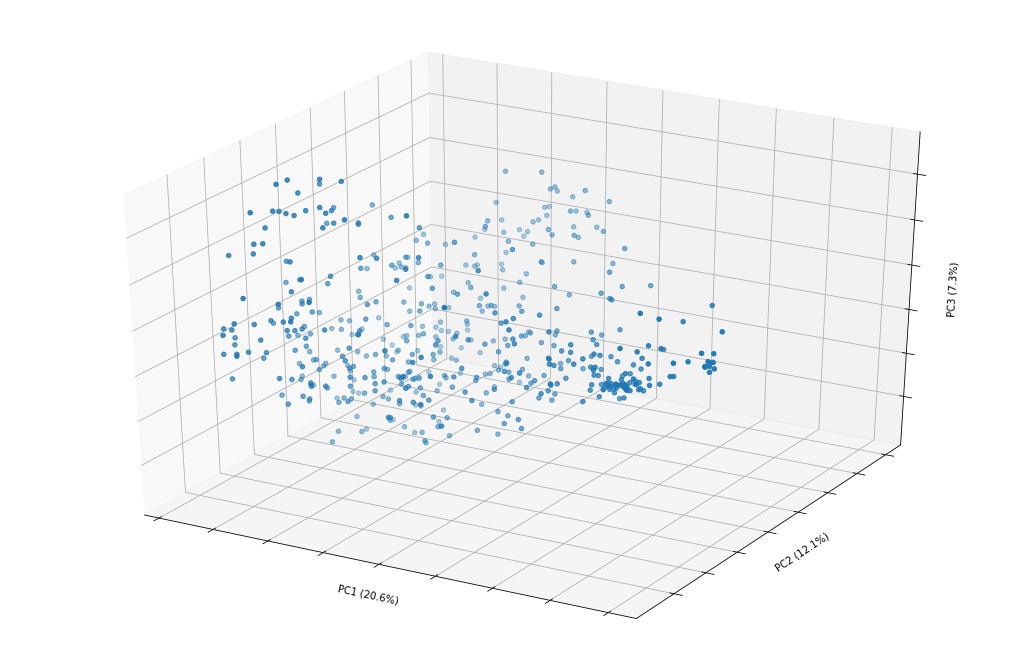

In [8]:
# Downloading 16S data
!curl -s -o iHMP_metabolomics.csv.gz \
    https://ibdmdb.org/tunnel/cb/document/Public/HMP2/Metabolites/1723/iHMP_metabolomics.csv.gz

df = pd.read_csv('iHMP_metabolomics.csv.gz', compression='gzip', dtype=str)
df.drop(['Method', 'Pooled QC sample CV', 'm/z', 'RT', 
         'HMDB (*Representative ID)', 'Metabolite'], axis=1, inplace=True)
df.set_index('Compound', inplace=True)
df.fillna(0, inplace=True)
df.to_csv('iHMP_metabolomics.csv', sep='\t')

!biom convert -i iHMP_metabolomics.csv -o iHMP_metabolomics.biom \
     --table-type="Metabolite table" --to-hdf5

# loading data
bf = load_table('iHMP_metabolomics.biom')
ids = bf.ids()
data = [bf.data(_id, axis='sample') for _id in ids]

# distance and pcoa
bc_dm = beta_diversity("braycurtis", data, ids, validate=False)
bc_pc = pcoa(bc_dm)

# plotting
f = bc_pc.plot(axis_labels=['PC%d (%.1f%%)' % (i + 1, bc_pc.eigvals[i]) for i in [0, 1, 2]])
f.set_size_inches(15, 10)

### Histogram of counts per sample

Similar to previous histogram, we would expect two scenarios:
- Absolute abundance: this should be the ideal sceneario. Samples ranging from 0 to millions (these are the intensities by mass spectrometry)
- Relative abundance: all samples should be between 0-1

This seems fine but the PCoA is not the same than in the MS

(array([ 539.,    2.,    2.,    0.,    0.,    0.,    1.,    1.,    0.,    1.]),
 array([  2.67962702e+10,   1.46941281e+13,   2.93614600e+13,
          4.40287919e+13,   5.86961238e+13,   7.33634557e+13,
          8.80307875e+13,   1.02698119e+14,   1.17365451e+14,
          1.32032783e+14,   1.46700115e+14]),
 <a list of 10 Patch objects>)

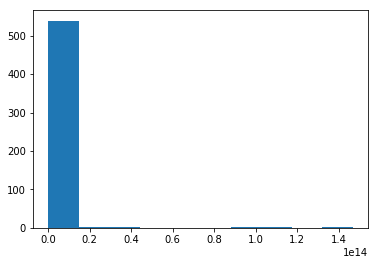

In [9]:
plt.hist([sum(bf.data(_id, axis='sample')) for _id in ids])